In [142]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [143]:
train  = pd.read_csv('D:/MS_Materials/Machine_learning/Individual_Project/twitter_data/train2.csv')
test = pd.read_csv('D:/MS_Materials/Machine_learning/Individual_Project/twitter_data/test2.csv')



In [144]:
train.head(5)

,label,id,Unnamed: 2,Unnamed: 3,Unnamed: 4,tweet
0,1,1467811369,Mon Apr 16 22:19:45 PDT 2119,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467811672,Mon Apr 16 22:19:49 PDT 2119,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1,1467811917,Mon Apr 16 22:19:53 PDT 2119,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [145]:
combi = train.append(test, ignore_index=True)

In [146]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [147]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [148]:
combi.head()


,label,id,Unnamed: 2,Unnamed: 3,Unnamed: 4,tweet,tidy_tweet
0,1,1467811369,Mon Apr 16 22:19:45 PDT 2119,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum..."
1,1,1467811672,Mon Apr 16 22:19:49 PDT 2119,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,1,1467811917,Mon Apr 16 22:19:53 PDT 2119,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,1,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,1,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."


In [149]:
# Removal of URL's from tweets
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace('http\S+|www.\S+', '', case=False)
combi.head()

,label,id,Unnamed: 2,Unnamed: 3,Unnamed: 4,tweet,tidy_tweet
0,1,1467811369,Mon Apr 16 22:19:45 PDT 2119,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- Awww, that's a bummer. You shoulda got Da..."
1,1,1467811672,Mon Apr 16 22:19:49 PDT 2119,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,1,1467811917,Mon Apr 16 22:19:53 PDT 2119,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,1,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,1,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."


In [150]:
def decontracted(tweet):
    # specific
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"can\'t", "can not", tweet)

    # general
    tweet = re.sub(r"n\'t", " not", tweet)
    tweet = re.sub(r"\'re", " are", tweet)
    tweet = re.sub(r"\'s", " is", tweet)
    tweet = re.sub(r"\'d", " would", tweet)
    tweet = re.sub(r"\'ll", " will", tweet)
    tweet = re.sub(r"\'t", " not", tweet)
    tweet = re.sub(r"\'ve", " have", tweet)
    tweet = re.sub(r"\'m", " am", tweet)
    return tweet

# Replacing single quote mentions in the tweet
combi['tidy_tweet'] = np.vectorize(decontracted)(combi['tidy_tweet'])
combi.head()

,label,id,Unnamed: 2,Unnamed: 3,Unnamed: 4,tweet,tidy_tweet
0,1,1467811369,Mon Apr 16 22:19:45 PDT 2119,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- Awww, that is a bummer. You shoulda got D..."
1,1,1467811672,Mon Apr 16 22:19:49 PDT 2119,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can not update his Facebook b...
2,1,1467811917,Mon Apr 16 22:19:53 PDT 2119,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,1,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,1,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it is not behaving at all. i am mad. why ..."


In [151]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [152]:
combi.head()

,label,id,Unnamed: 2,Unnamed: 3,Unnamed: 4,tweet,tidy_tweet
0,1,1467811369,Mon Apr 16 22:19:45 PDT 2119,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Awww that is a bummer You shoulda got D...
1,1,1467811672,Mon Apr 16 22:19:49 PDT 2119,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can not update his Facebook b...
2,1,1467811917,Mon Apr 16 22:19:53 PDT 2119,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to s...
3,1,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,1,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it is not behaving at all i am mad why ...


In [153]:
# Revert the repeated characters back to their original
combi['tidy_tweet']= combi['tidy_tweet'].str.replace(r'(\w)\1{%d,}'%(3), r'\1')

In [154]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Awww, that, bummer, You, shoulda, got, David,...
1    [upset, that, can, not, update, his, Facebook,...
2    [dived, many, times, for, the, ball, Managed, ...
3    [whole, body, feels, itchy, and, like, its, fire]
4    [not, behaving, all, mad, why, here, because, ...
Name: tidy_tweet, dtype: object

In [155]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [awww, that, bummer, you, shoulda, got, david,...
1    [upset, that, can, not, updat, hi, facebook, t...
2    [dive, mani, time, for, the, ball, manag, save...
3      [whole, bodi, feel, itchi, and, like, it, fire]
4    [not, behav, all, mad, whi, here, becaus, can,...
Name: tidy_tweet, dtype: object

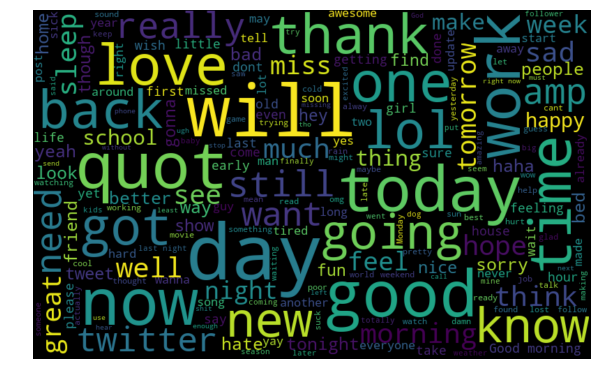

In [156]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

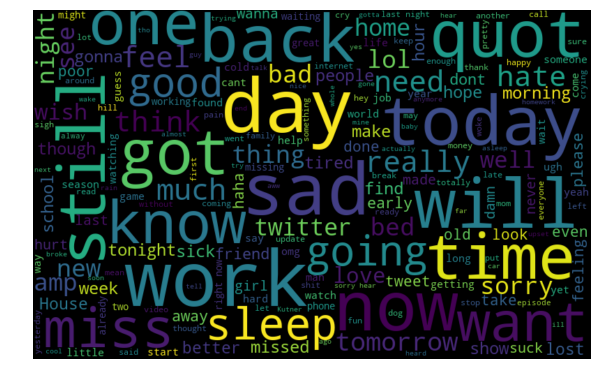

In [157]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [158]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [159]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [160]:
HT_negative

['itm',
 'therapyfail',
 'fb',
 'TTSC',
 'gayforpeavy',
 'FML',
 'camerafail',
 'fb',
 'travian',
 'wow',
 'art',
 'fail',
 'KrispyKreme',
 'fb',
 'the',
 'twitter',
 'fail',
 'kilaumeet']

In [161]:
a = nltk.FreqDist(HT_regular)

In [162]:
a

FreqDist({'Devunity': 1, 'Alexa': 1, 'Japan': 1, 'Skype': 1, 'expletives': 1, 'musicmonday': 1, 'Chuck': 1, 'nightcard': 1, 'Paragon': 1, 'dogs': 1, ...})

In [163]:
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

In [164]:
d.head()

,Hashtag,Count
0,Devunity,1
1,Alexa,1
2,Japan,1
3,Skype,1
4,expletives,1


In [165]:
# selecting top 10 most frequent hashtags     
#d = d.nlargest(columns="Count", n = 10) 
#plt.figure(figsize=(16,5))
#ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
#ax.set(ylabel = 'Count')
#plt.show()

In [166]:
#b = nltk.FreqDist(HT_negative)
#e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
#e = e.nlargest(columns="Count", n = 10)   
#plt.figure(figsize=(16,5))
#ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
#ax.set(ylabel = 'Count')
#plt.show()

In [167]:

bow_vectorizer = CountVectorizer(max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [168]:
bow

<3101x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 12410 stored elements in Compressed Sparse Row format>

In [169]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [170]:
train_bow = bow[:3001,:]
test_bow = bow[3001:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.1)


In [171]:
def Logistic_Regression(xtrain,ytrain,xvalid,yvalid):
    lreg = LogisticRegression()
    lreg.fit(xtrain, ytrain)
    prediction = lreg.predict(xvalid)
    acurracy = accuracy_score(yvalid,prediction)
    print("Accuracy_LREG "+str(acurracy))
    prediction_proba = lreg.predict_proba(xvalid)
    prediction_int = prediction_proba[:,1] >= 0.3
    prediction_int = prediction_int.astype(np.int)
    return prediction_int

def Multinomial_NB(xtrain,ytrain,xvalid,yvalid):
    clf=MultinomialNB()
    clf.fit(xtrain, ytrain) # training the model
    prediction = clf.predict(xvalid) # predicting on the validation set
    prediction_proba = clf.predict_proba(xvalid) # predicting on the validation set
    prediction_int = prediction_proba[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 then 1 else 0
    prediction_int = prediction_int.astype(np.int)
    acurracy = accuracy_score(yvalid,prediction)
    print("Accuracy_NB "+str(acurracy))
    return prediction_int

def Support_Vector_Machine(xtrain,ytrain,xvalid,yvalid):
    clf=svm.SVC(C=100,gamma=0.5,kernel='linear',probability=True)
    clf.fit(xtrain, ytrain) # training the model
    prediction = clf.predict(xvalid) # predicting on the validation set
    prediction_proba = clf.predict_proba(xvalid) # predicting on the validation set
    prediction_int = prediction_proba[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 then 1 else 0
    prediction_int = prediction_int.astype(np.int)
    acurracy = accuracy_score(yvalid,prediction)
    print("Accuracy_SVM "+str(acurracy))
    return prediction_int

def RandomForest(xtrain,ytrain,xvalid,yvalid):
    clf=RandomForestClassifier(max_depth=30,n_estimators=100)
    clf.fit(xtrain, ytrain) # training the model
    prediction = clf.predict(xvalid) # predicting on the validation set
    prediction_proba = clf.predict_proba(xvalid) # predicting on the validation set
    prediction_int = prediction_proba[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 then 1 else 0
    prediction_int = prediction_int.astype(np.int)
    acurracy = accuracy_score(yvalid,prediction)
    print("Accuracy_RF "+str(acurracy))
    return prediction_int

In [172]:
prediction_int = Logistic_Regression(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

prediction_int = Multinomial_NB(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

prediction_int = Support_Vector_Machine(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

prediction_int = RandomForest(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

Accuracy_LREG 0.7043189368770764
73.05699481865285
Accuracy_NB 0.717607973421927
73.224043715847
Accuracy_SVM 0.6445182724252492
69.62305986696231
Accuracy_RF 0.707641196013289
70.96774193548387


In [173]:
#Building model using TF-IDF features
train_tfidf = tfidf[:3001,:]
test_tfidf = tfidf[3001:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]


In [174]:
prediction_int = Logistic_Regression(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

prediction_int = Multinomial_NB(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

prediction_int = Support_Vector_Machine(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

prediction_int = RandomForest(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

Accuracy_LREG 0.7043189368770764
72.94685990338165
Accuracy_NB 0.7043189368770764
73.60774818401937
Accuracy_SVM 0.6411960132890365
70.34482758620689
Accuracy_RF 0.6611295681063123
70.93821510297484


# Not Removing URLs

In [175]:
# remove twitter handles (@user)
combi['tidy_tweet_URL'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
# Replacing single quote mentions in the tweet
combi['tidy_tweet_URL'] = np.vectorize(decontracted)(combi['tidy_tweet_URL'])
combi.head()
# remove special characters, numbers, punctuations
combi['tidy_tweet_URL'] = combi['tidy_tweet_URL'].str.replace("[^a-zA-Z#]", " ")
# Revert the repeated characters back to their original
combi['tidy_tweet_URL']= combi['tidy_tweet_URL'].str.replace(r'(\w)\1{%d,}'%(3), r'\1')
combi['tidy_tweet_URL'] = combi['tidy_tweet_URL'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
tokenized_tweet = combi['tidy_tweet_URL'].apply(lambda x: x.split())

bow_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet_URL'])
train_bow = bow[:3001,:]
test_bow = bow[3001:,:]

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet_URL'])

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.1)

prediction_int = Logistic_Regression(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Multinomial_NB(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Support_Vector_Machine(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = RandomForest(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

#Building model using TF-IDF features
train_tfidf = tfidf[:3001,:]
test_tfidf = tfidf[3001:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

prediction_int = Logistic_Regression(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Multinomial_NB(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Support_Vector_Machine(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = RandomForest(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

Accuracy_LREG 0.717607973421927
72.86821705426357
Accuracy_NB 0.7142857142857143
73.13019390581718
Accuracy_SVM 0.6511627906976745
69.52595936794582
Accuracy_RF 0.6710963455149501
71.88940092165899
Accuracy_LREG 0.7109634551495017
73.42995169082126
Accuracy_NB 0.7043189368770764
73.96593673965938
Accuracy_SVM 0.6578073089700996
69.5852534562212
Accuracy_RF 0.6677740863787376
70.9090909090909


# Not Removing Stopwords

In [176]:
# remove twitter handles (@user)
combi['tidy_tweet_Stopwords'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
# Removal of URL's from tweets
combi['tidy_tweet_Stopwords'] = combi['tidy_tweet_Stopwords'].str.replace('http\S+|www.\S+', '', case=False)
# Replacing single quote mentions in the tweet
combi['tidy_tweet_Stopwords'] = np.vectorize(decontracted)(combi['tidy_tweet_Stopwords'])
combi.head()
# remove special characters, numbers, punctuations
combi['tidy_tweet_Stopwords'] = combi['tidy_tweet_Stopwords'].str.replace("[^a-zA-Z#]", " ")
# Revert the repeated characters back to their original
combi['tidy_tweet_Stopwords']= combi['tidy_tweet_Stopwords'].str.replace(r'(\w)\1{%d,}'%(3), r'\1')
combi['tidy_tweet_Stopwords'] = combi['tidy_tweet_Stopwords'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
tokenized_tweet = combi['tidy_tweet_Stopwords'].apply(lambda x: x.split())

bow_vectorizer = CountVectorizer(max_features=1000)
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet_Stopwords'])
train_bow = bow[:3001,:]
test_bow = bow[3001:,:]

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet_Stopwords'])

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.1)

prediction_int = Logistic_Regression(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Multinomial_NB(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Support_Vector_Machine(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = RandomForest(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

#Building model using TF-IDF features
train_tfidf = tfidf[:3001,:]
test_tfidf = tfidf[3001:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

prediction_int = Logistic_Regression(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Multinomial_NB(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Support_Vector_Machine(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = RandomForest(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

Accuracy_LREG 0.6976744186046512
73.31536388140162
Accuracy_NB 0.717607973421927
74.93112947658403
Accuracy_SVM 0.6511627906976745
67.27688787185355
Accuracy_RF 0.7142857142857143
71.62790697674419
Accuracy_LREG 0.717607973421927
74.09200968523002
Accuracy_NB 0.7109634551495017
74.03846153846155
Accuracy_SVM 0.6611295681063123
68.99766899766898
Accuracy_RF 0.6910299003322259
71.16279069767441


# Not Removing Numbers

In [177]:
# remove twitter handles (@user)
combi['tidy_tweet_Numbers'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
# Removal of URL's from tweets
combi['tidy_tweet_Numbers'] = combi['tidy_tweet_Numbers'].str.replace('http\S+|www.\S+', '', case=False)
# Replacing single quote mentions in the tweet
combi['tidy_tweet_Numbers'] = np.vectorize(decontracted)(combi['tidy_tweet_Numbers'])
combi.head()
# remove special characters, punctuations
combi['tidy_tweet_Numbers'] = combi['tidy_tweet_Numbers'].str.replace("[^a-zA-Z0-9#]", " ")
# Revert the repeated characters back to their original
combi['tidy_tweet_Numbers']= combi['tidy_tweet_Numbers'].str.replace(r'(\w)\1{%d,}'%(3), r'\1')
combi['tidy_tweet_Numbers'] = combi['tidy_tweet_Numbers'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
tokenized_tweet = combi['tidy_tweet_Numbers'].apply(lambda x: x.split())

bow_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet_Numbers'])
train_bow = bow[:3001,:]
test_bow = bow[3001:,:]

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet_Numbers'])

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.1)

prediction_int = Logistic_Regression(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Multinomial_NB(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Support_Vector_Machine(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = RandomForest(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

#Building model using TF-IDF features
train_tfidf = tfidf[:3001,:]
test_tfidf = tfidf[3001:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

prediction_int = Logistic_Regression(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Multinomial_NB(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Support_Vector_Machine(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = RandomForest(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

Accuracy_LREG 0.6943521594684385
73.00771208226222
Accuracy_NB 0.7209302325581395
73.224043715847
Accuracy_SVM 0.6578073089700996
69.95515695067265
Accuracy_RF 0.6777408637873754
71.461716937355
Accuracy_LREG 0.707641196013289
72.94685990338165
Accuracy_NB 0.6976744186046512
73.3009708737864
Accuracy_SVM 0.6445182724252492
70.0228832951945
Accuracy_RF 0.6877076411960132
70.31963470319634


# Not Reverting words to original

In [178]:
# remove twitter handles (@user)
combi['tidy_tweet_not_original'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
# Removal of URL's from tweets
combi['tidy_tweet_not_original'] = combi['tidy_tweet_not_original'].str.replace('http\S+|www.\S+', '', case=False)
# Replacing single quote mentions in the tweet
combi['tidy_tweet_not_original'] = np.vectorize(decontracted)(combi['tidy_tweet_not_original'])
combi.head()
# remove special characters,numbers and punctuations
combi['tidy_tweet_not_original'] = combi['tidy_tweet_not_original'].str.replace("[^a-zA-Z#]", " ")

combi['tidy_tweet_not_original'] = combi['tidy_tweet_not_original'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
tokenized_tweet = combi['tidy_tweet_not_original'].apply(lambda x: x.split())

bow_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet_not_original'])
train_bow = bow[:3001,:]
test_bow = bow[3001:,:]

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet_not_original'])

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.1)

prediction_int = Logistic_Regression(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Multinomial_NB(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Support_Vector_Machine(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = RandomForest(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

#Building model using TF-IDF features
train_tfidf = tfidf[:3001,:]
test_tfidf = tfidf[3001:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

prediction_int = Logistic_Regression(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Multinomial_NB(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Support_Vector_Machine(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = RandomForest(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

Accuracy_LREG 0.6877076411960132
73.05699481865285
Accuracy_NB 0.7209302325581395
73.42465753424656
Accuracy_SVM 0.6677740863787376
68.88888888888889
Accuracy_RF 0.6843853820598007
71.19437939110071
Accuracy_LREG 0.7043189368770764
72.46376811594203
Accuracy_NB 0.7009966777408638
73.34963325183375
Accuracy_SVM 0.6578073089700996
69.23076923076924
Accuracy_RF 0.6710963455149501
71.10091743119267


# Not Replacing Negations

In [179]:
# remove twitter handles (@user)
combi['tidy_tweet_Negations'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
# Removal of URL's from tweets
combi['tidy_tweet_Negations'] = combi['tidy_tweet_Negations'].str.replace('http\S+|www.\S+', '', case=False)
combi.head()
# remove special characters,numbers and punctuations
combi['tidy_tweet_Negations'] = combi['tidy_tweet_Negations'].str.replace("[^a-zA-Z#]", " ")
# Revert the repeated characters back to their original
combi['tidy_tweet_Negations']= combi['tidy_tweet_Negations'].str.replace(r'(\w)\1{%d,}'%(3), r'\1')
combi['tidy_tweet_Negations'] = combi['tidy_tweet_Negations'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
tokenized_tweet = combi['tidy_tweet_Negations'].apply(lambda x: x.split())

bow_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet_Negations'])
train_bow = bow[:3001,:]
test_bow = bow[3001:,:]

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet_Negations'])

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.1)

prediction_int = Logistic_Regression(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Multinomial_NB(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Support_Vector_Machine(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = RandomForest(xtrain_bow,ytrain,xvalid_bow,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

#Building model using TF-IDF features
train_tfidf = tfidf[:3001,:]
test_tfidf = tfidf[3001:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

prediction_int = Logistic_Regression(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Multinomial_NB(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = Support_Vector_Machine(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score
prediction_int = RandomForest(xtrain_tfidf,ytrain,xvalid_tfidf,yvalid)
print(f1_score(yvalid, prediction_int)*100) # calculating f1 score

Accuracy_LREG 0.7109634551495017
72.72727272727273
Accuracy_NB 0.7209302325581395
74.52054794520548
Accuracy_SVM 0.6611295681063123
68.31460674157303
Accuracy_RF 0.707641196013289
71.13163972286374
Accuracy_LREG 0.7242524916943521
73.60774818401937
Accuracy_NB 0.7009966777408638
73.78640776699031
Accuracy_SVM 0.6877076411960132
68.02721088435375
Accuracy_RF 0.6877076411960132
71.16279069767441
